# `Applied Machine Learning`

##### This lab was designed and approved by Donat Balaj (dbalaj@constructor.university).

## `Lab 1. Data domains and machine learning tasks`
The most common machine learning tasks are classification and regression. However, real-world applications are more diverse, and each data domain presents unique challenges that ML specialists tackle with varying degrees of success.

Fiest, we install the torchaudio library using pip and suppress installation logs by redirecting output to /dev/null.

In [ ]:
!pip install torchaudio >> /dev/null

The next step is to import pandas and numpy for data manipulation, matplotlib.pyplot and seaborn for visualization, then update plot font size and set a clean grid style for better readability.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
sns.set_style('whitegrid')

## Synthetic/Geometric data

- All dependencies between the target variable and features are known exactly since they are manually defined.

- Useful for visualizing how algorithms work.

Note: This is an example of good plot design.

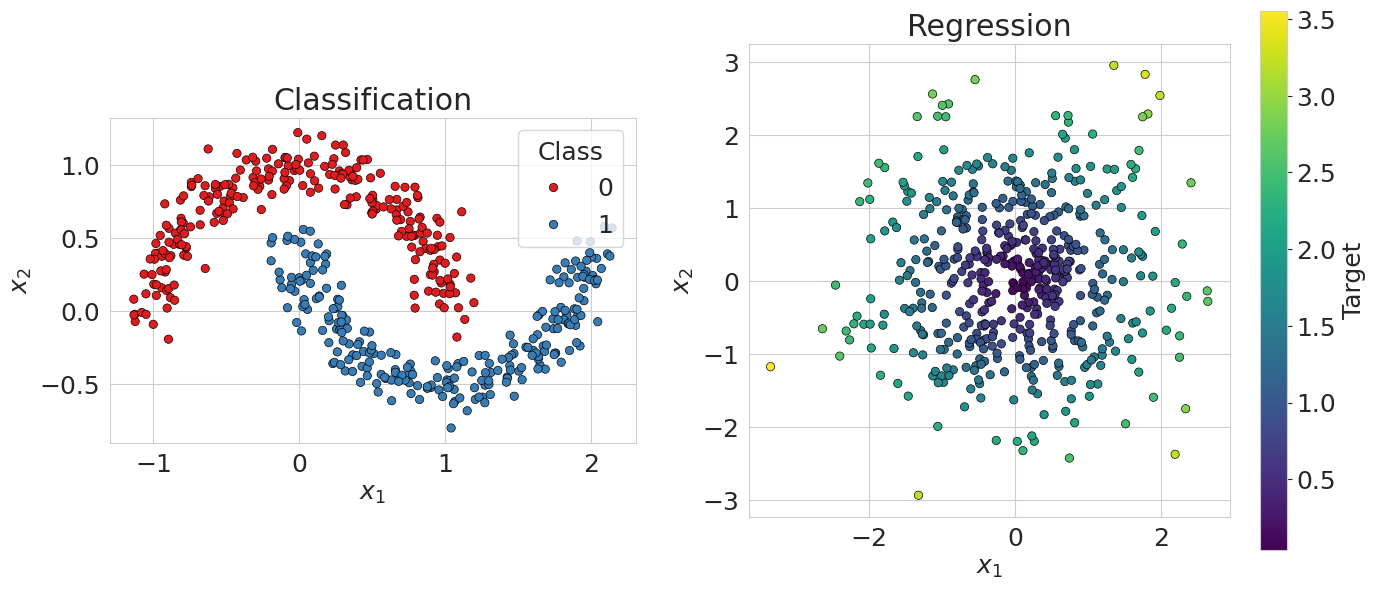

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=0)

# Generate regression dataset
X_reg = np.random.randn(500, 2)
y_reg = np.sqrt((X_reg ** 2).sum(axis=1))

# Create subplots
fig, axs = plt.subplots(figsize=(16, 7), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1.75, 2]})

# Classification plot
sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_moons, ax=axs[0], palette='Set1', edgecolor='k')
axs[0].legend(title='Class')
axs[0].set_title('Classification')

# Regression plot
norm = plt.Normalize(y_reg.min(), y_reg.max())  # Normalize color scale
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array(y_reg)  # Associate data with ScalarMappable

scatter = sns.scatterplot(x=X_reg[:, 0], y=X_reg[:, 1], hue=y_reg, ax=axs[1], palette='viridis', edgecolor='k', legend=False)

# Add colorbar to figure (not individual axis)
cbar = fig.colorbar(sm, ax=axs[1])
cbar.set_label('Target')

axs[1].set_title('Regression')

# Common axis labels
for ax in axs:
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_aspect('equal')  # Ensures equal scaling

plt.show()

## Tabular data

While most data can be formatted as a table, here we refer to data that is inherently tabular, where each feature represents a distinct and meaningful dimension of different nature.

This is one of the most common data types.
Features are typically categorized as numeric or categorical.

In [ ]:
from sklearn.datasets import load_iris

X = load_iris()
X = pd.DataFrame(data=np.concatenate((X['data'], X['target'].reshape(-1, 1)), axis=1),
                 columns=list(X['feature_names']) + ['target'])
X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

## Images

The branch of machine learning that deals with images is called **computer vision** (CV). Images are typically represented as tensors (multidimensional arrays) of size $(H, W, C)$, where $C = 3$ for colored images. The tensor's content depends on the color space, with RGB being the most commonly used.

In [ ]:
! wget -O image.jpg 'https://images.unsplash.com/photo-1533450718592-29d45635f0a9'

--2025-02-09 10:18:38--  https://images.unsplash.com/photo-1533450718592-29d45635f0a9
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2283322 (2.2M) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   2.18M  --.-KB/s    in 0.05s   

2025-02-09 10:18:38 (47.7 MB/s) - ‘image.jpg’ saved [2283322/2283322]



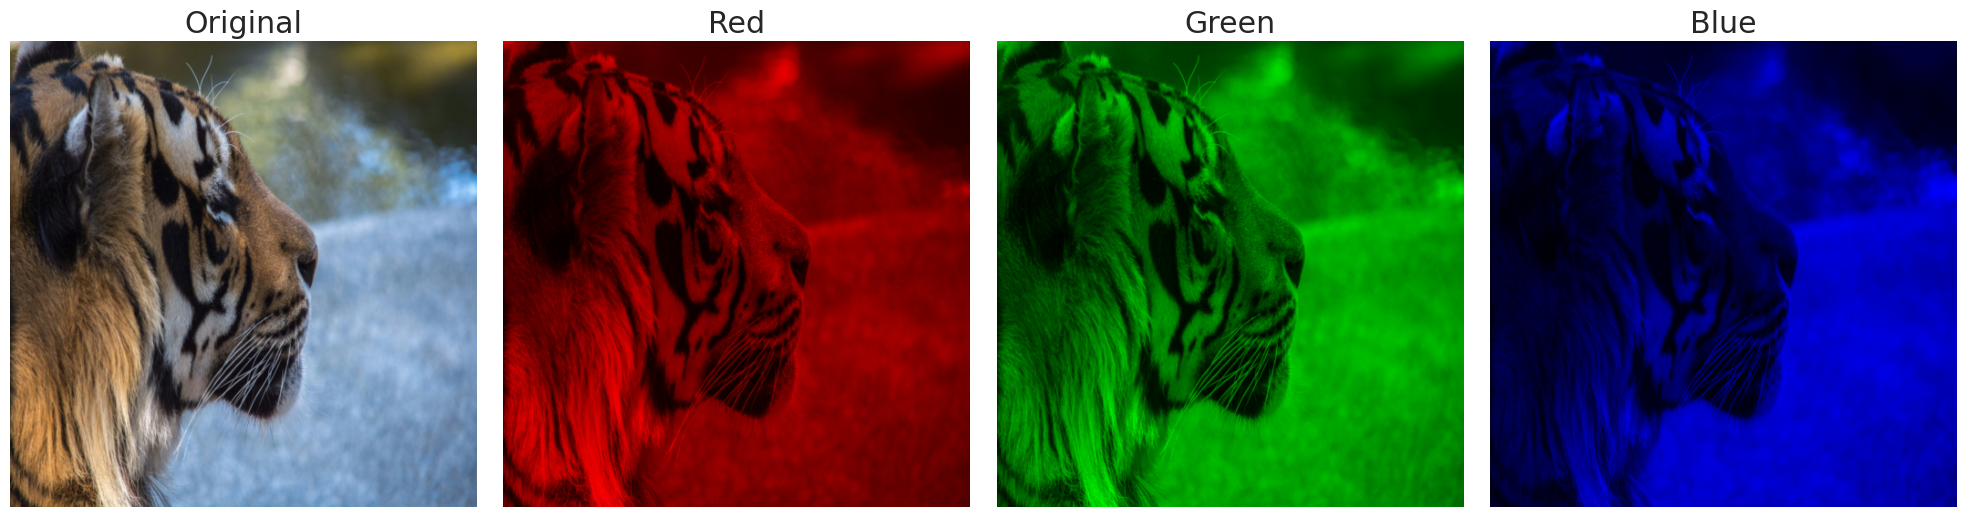

In [ ]:
from skimage import io, color
from skimage.transform import resize

rgb_image = resize(io.imread('image.jpg'), (512, 512))
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

red_image = np.copy(rgb_image)
red_image[..., 1:] = 0.0
axs[1].imshow(red_image)

green_image = np.copy(rgb_image)
green_image[..., [0, 2]] = 0.0
axs[2].imshow(green_image)

blue_image = np.copy(rgb_image)
blue_image[..., :2] = 0.0
axs[3].imshow(blue_image)

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Red', 'Green', 'Blue']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

We convert an RGB image to the LAB color space, isolate each channel (L for luminosity, A for red-green, B for blue-yellow), and convert them back to RGB to visualize their individual effects.

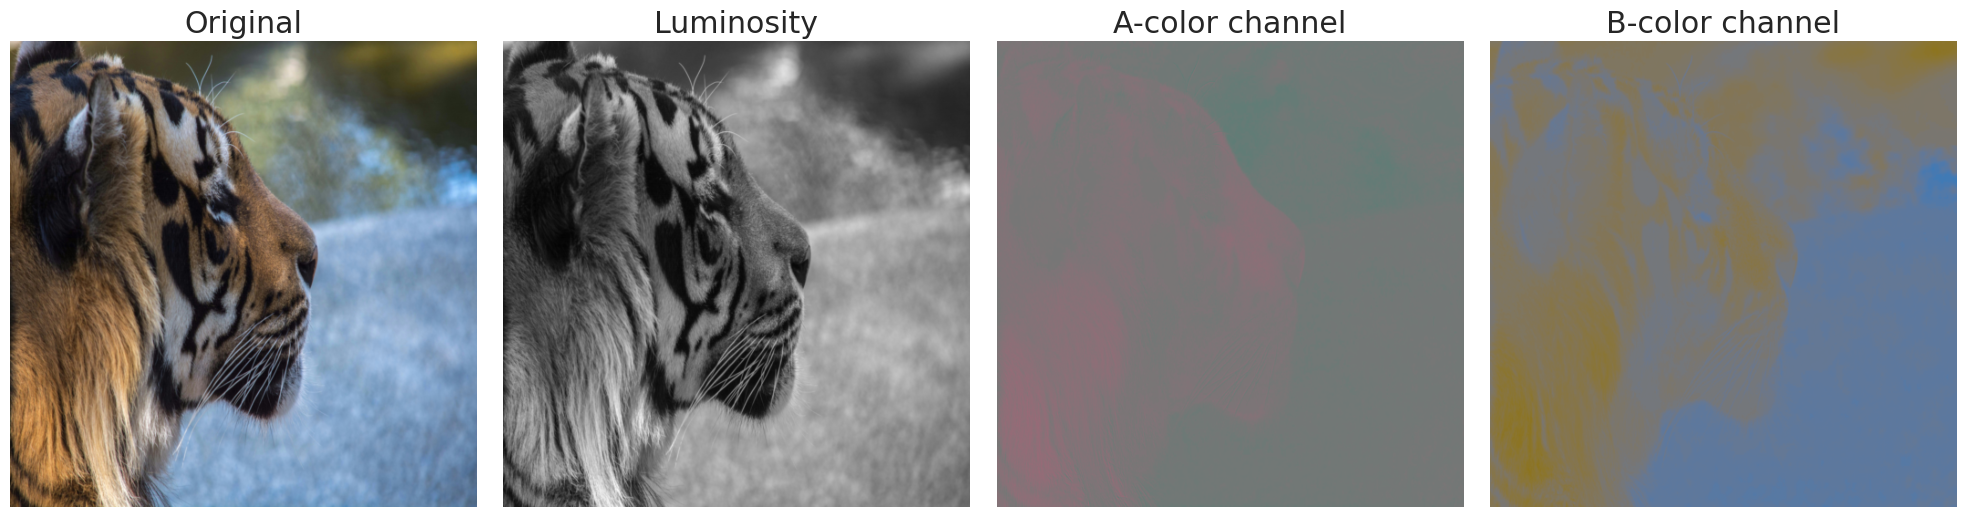

In [ ]:
lab_image = color.rgb2lab(rgb_image)
fix, axs = plt.subplots(figsize=(20, 6), nrows=1, ncols=4)
axs[0].imshow(rgb_image)

l_image = np.copy(lab_image)
l_image[..., 1:] = 0.0
axs[1].imshow(color.lab2rgb(l_image))

a_image = np.copy(lab_image)
a_image[..., 0] = 50
a_image[..., 2] = 0
axs[2].imshow(color.lab2rgb(a_image))

b_image = np.copy(lab_image)
b_image[..., 0] = 50
b_image[..., 1] = 0
axs[3].imshow(color.lab2rgb(b_image))

for ax in axs:
    ax.grid(False)
    ax.axis('off')

for ax, title in zip(axs, ['Original', 'Luminosity', 'A-color channel', 'B-color channel']):
    ax.set_title(title)

plt.tight_layout()
plt.show()

### **Semantic Segmentation**

In ML, we also deal with semantic segmentation, where each pixel is assigned a class label, as seen in datasets like PASCAL VOC (general objects) and Cityscapes (urban scenes).



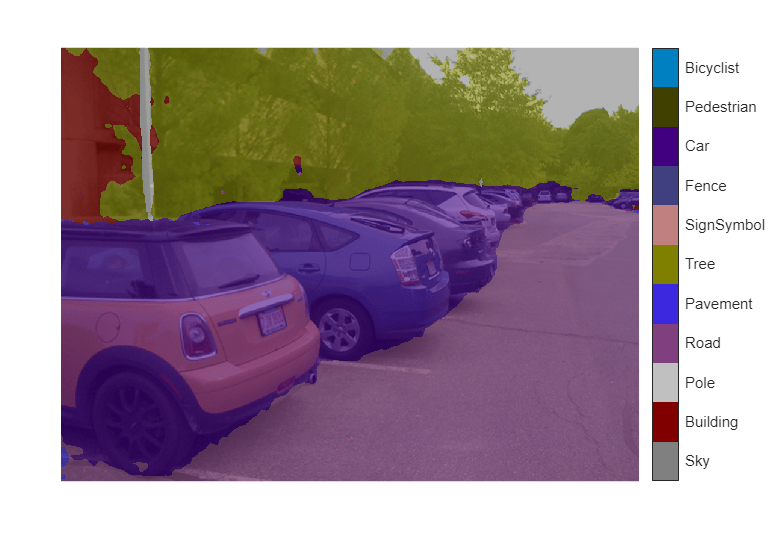

### **Object detection** (COCO, PASCAL VOC)

Are you amazed by the power of AI and ML yet? This is where it happens for many. Sometimes, we work on object detection, where models identify and locate multiple objects in an image, using datasets like COCO and PASCAL VOC. While it is not always accurate (like saying a fire hydrant is a person), it’s fascinating to see how far we’ve come in teaching machines to interpret the world visually.

<ipython-input-22-e43e7e8d0d6b>:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap("tab20", len(COCO_CLASSES))


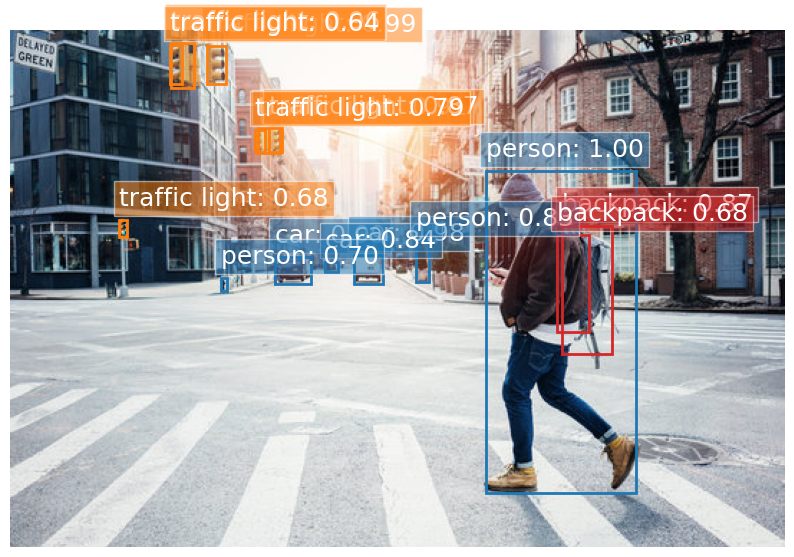

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torchvision.transforms as T
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# COCO Class Labels
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant',
    'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Step 1: Download the image from the URL
url = "https://t4.ftcdn.net/jpg/02/65/06/79/360_F_265067956_qHsoCnlJZnYMYoPVlq0PRs8MF8JyZuzF.jpg"
response = requests.get(url, stream=True)
response.raise_for_status()  # Ensure the request was successful
image = Image.open(response.raw).convert("RGB")

# Step 2: Transform the image for the model
transform = T.Compose([T.ToTensor()])
input_tensor = transform(image).unsqueeze(0)

# Step 3: Load pre-trained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 4: Perform object detection
with torch.no_grad():
    predictions = model(input_tensor)

# Step 5: Get the prediction results
pred_boxes = predictions[0]['boxes'].cpu().numpy()
pred_labels = predictions[0]['labels'].cpu().numpy()
pred_scores = predictions[0]['scores'].cpu().numpy()

# Filter predictions by confidence threshold
confidence_threshold = 0.5
filtered_boxes = pred_boxes[pred_scores > confidence_threshold]
filtered_labels = pred_labels[pred_scores > confidence_threshold]
filtered_scores = pred_scores[pred_scores > confidence_threshold]

# Generate a colormap
colormap = plt.cm.get_cmap("tab20", len(COCO_CLASSES))

# Step 6: Plot the image with bounding boxes and labels
plt.figure(figsize=(10, 8))
plt.imshow(image)
ax = plt.gca()

# Add bounding boxes and labels to the image
for box, label, score in zip(filtered_boxes, filtered_labels, filtered_scores):
    xmin, ymin, xmax, ymax = box
    color = colormap(label / len(COCO_CLASSES))
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                              linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    class_name = COCO_CLASSES[label]
    ax.text(xmin, ymin - 10, f"{class_name}: {score:.2f}", color='white',
            bbox=dict(facecolor=color, alpha=0.5))

plt.axis('off')
plt.show()


And many other tasks, such as **pose estimation**, scene reconstruction, and more, are explored in machine learning. Additionally, various generative tasks, like **style transfer**, **super-resolution**, and image synthesis, play a significant role in visual AI.




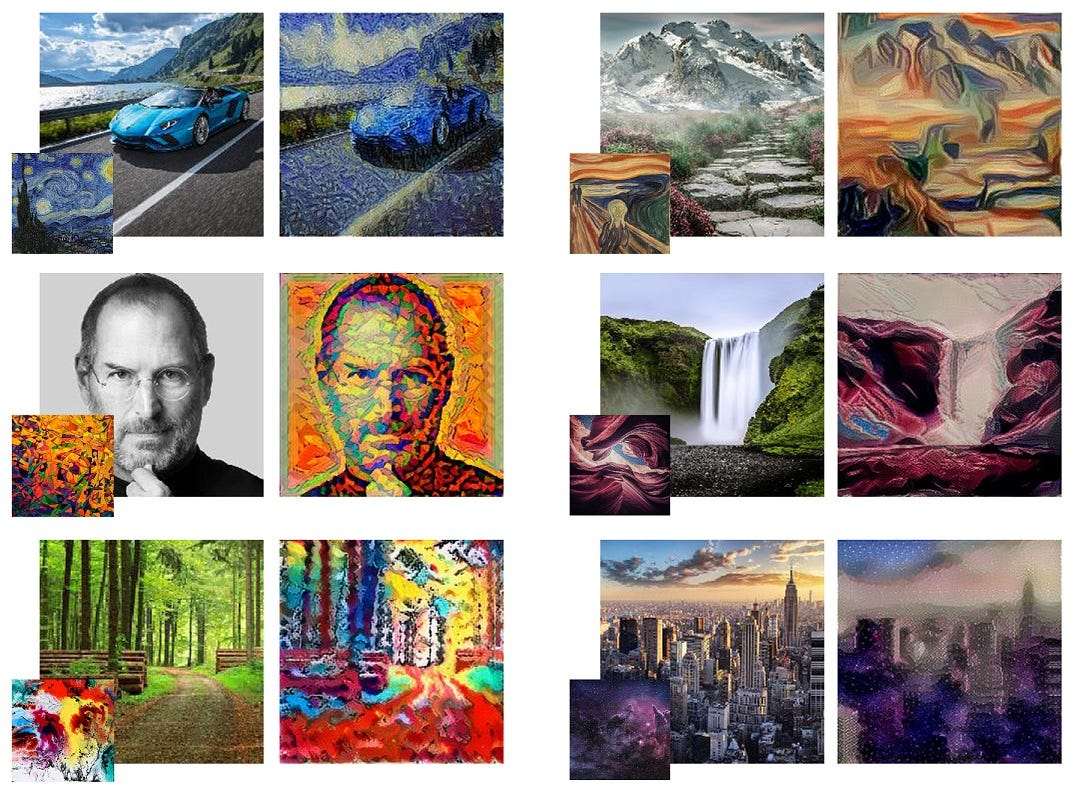




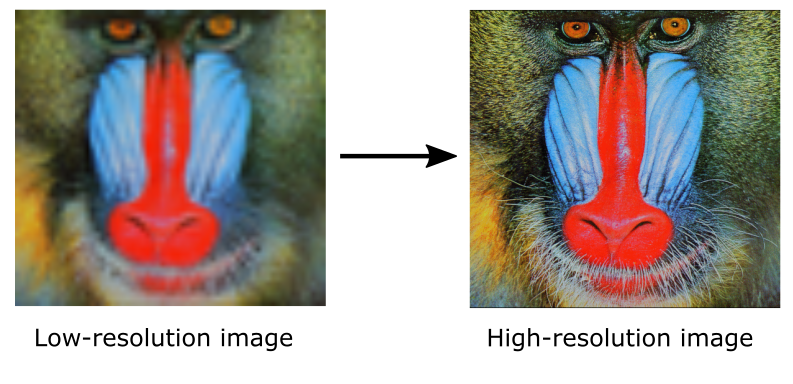





## Text data

Natural Language Processing (NLP) is a major area of machine learning, with its methods often applied beyond text. Text is discrete and sequential, typically tokenized (by characters, words, or byte-pair encoding) and transformed into embeddings for continuous models. Recently, ML has expanded to process structured sequences like program code.

## Audio  

Audio recordings are typically represented as sequences of real numbers in the range $[-1, 1]$ (WAV format) and can be **single-channel or multi-channel**. In music processing, the **MIDI format** is commonly used. The most widely used representation is the **spectrogram**, generated by applying the **Fourier transform** or its variations to convert sound waves into a visual format for analysis.

In [ ]:
import librosa  # Library for audio processing
import torch  # PyTorch for tensor operations
import torchaudio  # PyTorch's audio processing library
from IPython.display import Audio  # For playing audio in Jupyter notebooks

# Load an example audio file (a trumpet sound) from Librosa's dataset
waveform, sample_rate = librosa.load(librosa.example('trumpet'))

# Convert the NumPy array to a PyTorch tensor for compatibility with PyTorch-based processing
waveform = torch.from_numpy(waveform)

# Play the audio in the notebook with the given sample rate
Audio(waveform, rate=sample_rate)

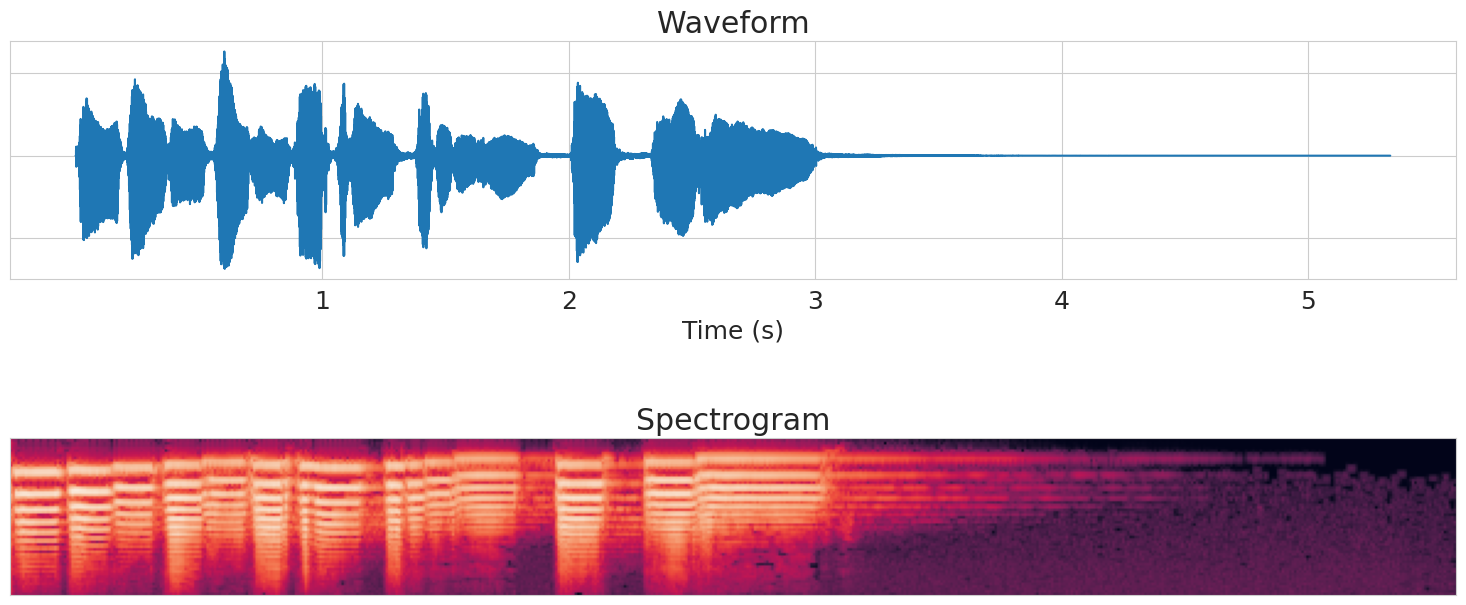

In [ ]:
# Create a Mel spectrogram transformer with 64 mel bands
spectrogramer = torchaudio.transforms.MelSpectrogram(n_mels=64, sample_rate=sample_rate)

# Compute the spectrogram from the waveform (adding a batch dimension before processing)
spec = spectrogramer(waveform.unsqueeze(0)).squeeze(0)

# Create a figure with two subplots: one for the waveform and one for the spectrogram
fig, axs = plt.subplots(figsize=(15, 8), nrows=2, ncols=1, gridspec_kw={'height_ratios': [1, 2]})

# Plot the waveform
axs[0].plot(waveform)
axs[0].set_xlabel('Time (s)')
axs[0].set_title('Waveform')

# Plot the spectrogram (log-transformed for better visualization)
axs[1].imshow(torch.log(spec + 1e-9))

# Set time markers (x-axis labels) in seconds for the waveform
pos = (np.arange(1, 6, 1) * sample_rate).astype(int)
axs[0].set_xticks(pos)
axs[0].xaxis.set_ticklabels([str(i) for i in range(1, 6)])
axs[0].yaxis.set_ticklabels([])

# Remove grid and labels from the spectrogram for a cleaner view
axs[1].grid(False)
axs[1].xaxis.set_ticklabels([])
axs[1].yaxis.set_ticklabels([])
axs[1].set_title('Spectrogram')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Video  

Working with video is similar to working with images, but with **time** added as a dimension alongside spatial and color channels. Sometimes, the **audio track** is also considered. Video tasks often extend image-based tasks by accounting for scene changes over time. Notable examples include **optical flow** (tracking pixel movement between frames) and **object tracking** (following moving objects across frames).

Processing video data with ML is challenging due to high computational cost, large data volume, and temporal dependencies. Additional difficulties include motion blur, occlusions, real-time processing, and complex data labeling.

In [ ]:
from IPython.display import Image
Image(url='https://learnopencv.com/wp-content/uploads/2022/03/Automatic-License-Plate-Recognition-using-Deep-Learning.gif')

## Graph Data  

Some data naturally forms a graph structure, such as molecules (where atoms are nodes and bonds are edges) or social networks (where profiles are nodes and connections are edges). Machine learning (ML) models can leverage this structure for more effective learning and representation.

Graph problems are typically categorized into:

1. **Vertex-level tasks** – e.g., predicting a user's social role.  
2. **Graph-level tasks** – e.g., classifying molecules based on their structure.

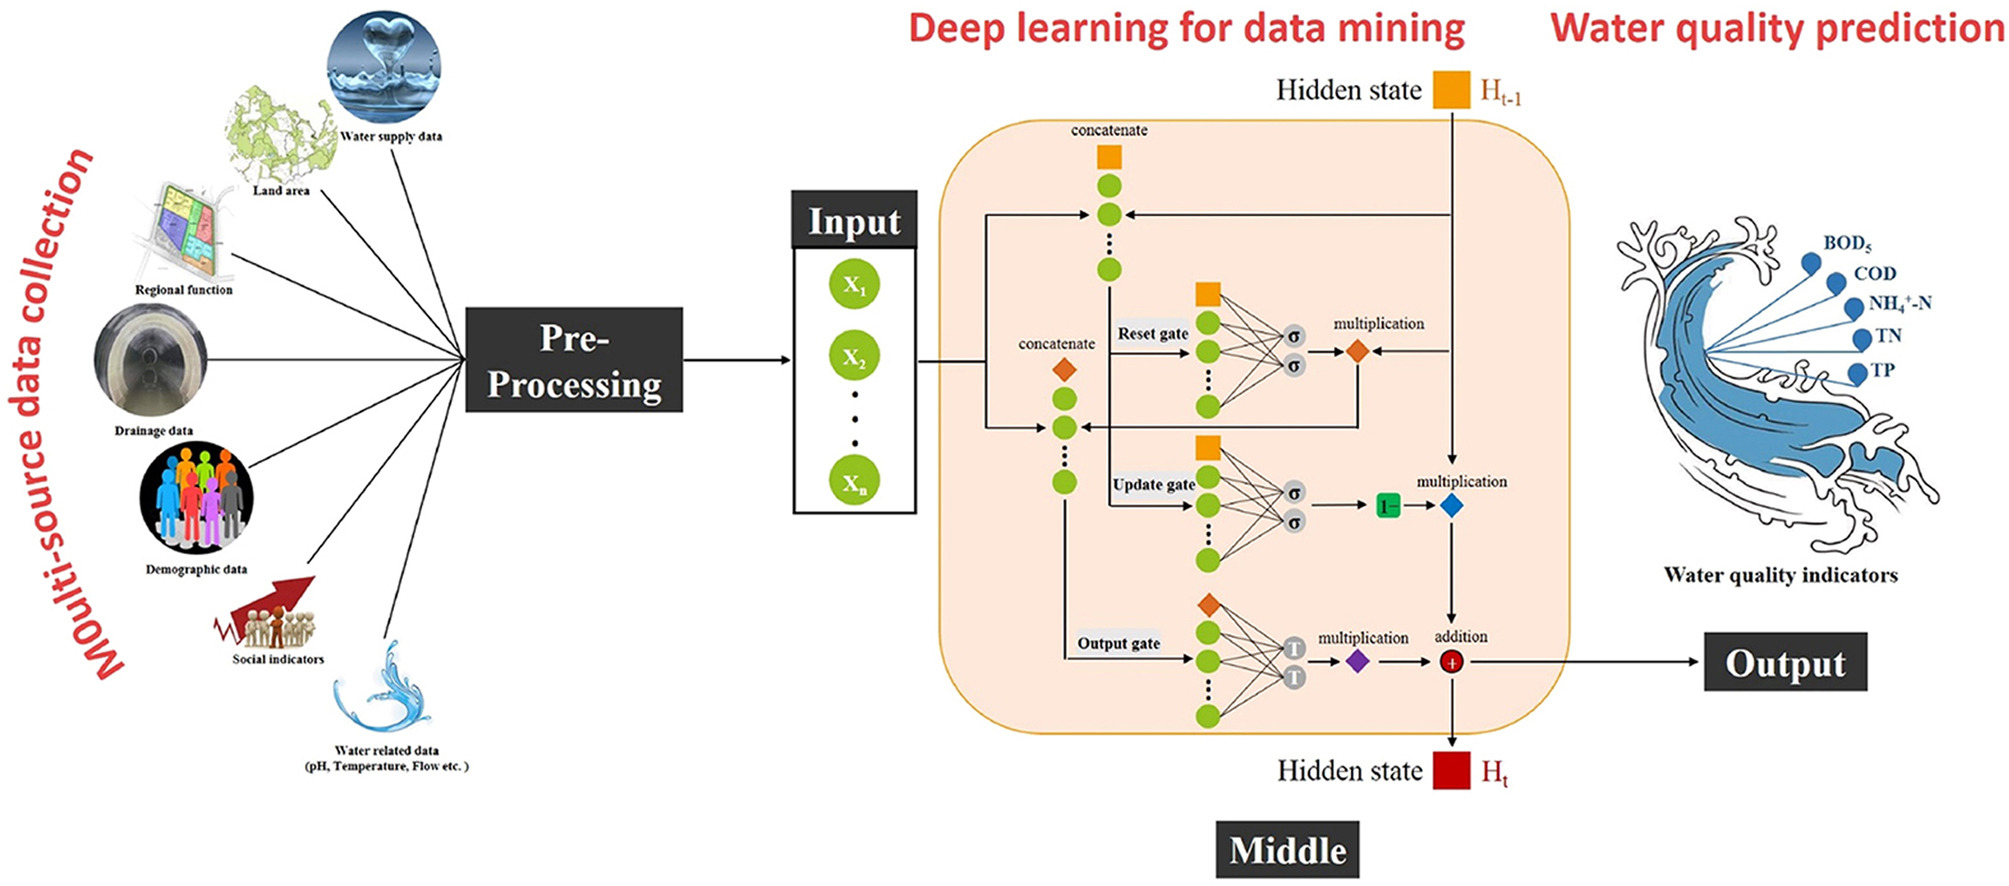

---

## Tasks to Complete This Lab  

This lab consists of several tasks, with a total of **10 points available**. A minimum of **5 points** is required to pass.

### **1️⃣ Code-Based Tasks (6 Points)**
These tasks require writing or modifying code.

#### **1.1 Generate and Visualize a Spectrogram (2 Points)**
📌 **Task:**  
- Load any audio file of your choice using `librosa` or `torchaudio`.  
- Generate and display a **Mel spectrogram** with 128 mel bands instead of 64.  
---

#### **1.2 Modify and Analyze Image Channels (2 Points)**
📌 **Task:**  
- Convert an image to the **LAB color space** and isolate the **L, A, and B** channels.  
- Modify the **A-channel** to shift colors toward red and display the result.  
---

#### **1.3 Implement Object Detection (2 Points)**
📌 **Task:**  
- Load an image and apply **object detection** using a pre-trained model (e.g., Faster R-CNN from `torchvision`).  
- Display the image with detected objects and bounding boxes.  
---

### **2️⃣ Conceptual Questions (4 Points)**
These questions test understanding of ML concepts.

#### **2.1 Explain Spectrograms (1 Point)**
📌 **Question:**  
- What does a spectrogram represent, and why is it useful in machine learning?  
---

#### **2.2 Semantic Segmentation vs. Object Detection (1 Point)**
📌 **Question:**  
- How does **semantic segmentation** differ from **object detection**?  
---

#### **2.3 Graph-Based Machine Learning (1 Point)**
📌 **Question:**  
- What are two types of problems in graph-based machine learning? Provide an example for each.  
---

#### **2.4 Video Processing in ML (1 Point)**
📌 **Question:**  
- Name one key challenge (that we discussed) in applying machine learning to video data.  
---

## **Grading Summary**
| **Task Category**           | **Points Available** |
|----------------------------|----------------------|
| **Code-Based Tasks**        | 6 Points |
| **Conceptual Questions**    | 4 Points |
| **Total Available Points**  | 10 Points |
| **Minimum Required to Pass** | 5 Points |


---

#### Image Sources

##### Usnplash. (n.d.). https://images.unsplash.com/photo-1533450718592-29d45635f0a9
---
##### Adobe Stock. (n.d.). Adobe Stock. https://stock.adobe.com/de/images/man-wearing-hat-and-jacket-walking-on-the-city-crossroad-with-mobile-phone-in-hand/265067956
---
##### Semantic segmentation using deep learning. (n.d.). https://de.mathworks.com/help/deeplearning/ug/semantic-segmen
---
##### darknet | LearnOpenCV. (2022, March 15). LearnOpenCV – Learn OpenCV, PyTorch, Keras, Tensorflow With Code, & Tutorials. https://learnopencv.com/tag/darknet/
---
##### Ganegedara, T. (2019, January 8). Intuitive guide to Neural style Transfer. Towards Data Science. https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-neural-style-transfer-ef88e46697ee/

---
##### MathWorks. (n.d.). https://de.mathworks.com/help/matlab/ref/imapprox.html
---
##### Jiang, Y., Li, C., Sun, L., Guo, D., Zhang, Y., & Wang, W. (2021). A deep learning algorithm for multi-source data fusion to predict water quality of urban sewer networks. Journal of Cleaner Production, 318, 128533. https://doi.org/10.1016/j.jclepro.2021.128533
